### Recipes 5k

* [Dataset](http://www.ub.edu/cvub/recipes5k/)

* [Original Paper](https://www.researchgate.net/publication/318729535_Food_Ingredients_Recognition_through_Multi-label_Learning)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/Recipes5k/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['image'], inplace=True)
df.head()

,class,split,ingredients,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,image_embedding_6,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,onion_rings,val,"yellow onion,flour,baking powder,seasoning sal...",-0.019941,0.046292,0.028163,0.013430,0.014544,0.018990,0.053650,...,-0.039769,0.010437,0.027736,0.016436,-0.014798,-0.043962,0.084459,0.100879,-0.040810,-0.026944
1,onion_rings,train,"white onion,panko,cornmeal,ground paprika,onio...",0.020726,0.047324,-0.009278,0.030066,0.009650,-0.022774,-0.009808,...,-0.028915,0.007126,0.033126,0.014813,0.006720,-0.033571,0.069636,0.070107,-0.047277,-0.035330
2,onion_rings,train,"yellow onion,all-purpose flour,baking powder,l...",-0.003352,0.036595,-0.010682,-0.004273,0.002105,0.032441,0.023189,...,0.004127,0.042316,0.007637,0.010198,-0.027701,-0.021962,0.090450,0.056628,-0.020075,-0.020748
3,onion_rings,train,"oil,pancake mix,spanish onion",-0.038810,0.060136,0.016056,0.013183,-0.003867,0.000385,0.018509,...,-0.009147,0.037166,0.001721,-0.013780,-0.009100,-0.031707,0.064553,0.031182,0.002685,-0.022401
4,onion_rings,train,"peanut oil,sweet onion,flour,eggs,celery salt,...",-0.012332,0.064609,-0.033546,-0.007815,0.015096,0.002560,0.014974,...,-0.009159,0.021923,0.001067,0.040090,-0.018709,-0.020262,0.047931,0.071678,-0.000059,-0.041866


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'class'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (3409, 1027)
Test Shape: (783, 1027)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.55 MB
The number of parameters of the model are: 144485


STAGE:2024-02-10 19:17:36 8107:8107 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.8059, macro-f1: 0.7863
Epoch 1/15 - Training Time: 0.41 seconds | Inference Time: 0.11 seconds
Epoch 2/15 - Test Accuracy: 0.8863, macro-f1: 0.8703
Epoch 2/15 - Training Time: 0.33 seconds | Inference Time: 0.13 seconds
Epoch 3/15 - Test Accuracy: 0.8978, macro-f1: 0.8840
Epoch 3/15 - Training Time: 0.37 seconds | Inference Time: 0.14 seconds
Epoch 4/15 - Test Accuracy: 0.9183, macro-f1: 0.9094
Epoch 4/15 - Training Time: 0.39 seconds | Inference Time: 0.13 seconds
Epoch 5/15 - Test Accuracy: 0.9144, macro-f1: 0.9083
Epoch 5/15 - Training Time: 0.37 seconds | Inference Time: 0.13 seconds
Epoch 6/15 - Test Accuracy: 0.9106, macro-f1: 0.9043
Epoch 6/15 - Training Time: 0.35 seconds | Inference Time: 0.12 seconds
Epoch 7/15 - Test Accuracy: 0.9259, macro-f1: 0.9187
Epoch 7/15 - Training Time: 0.40 seconds | Inference Time: 0.14 seconds
Epoch 8/15 - Test Accuracy: 0.9259, macro-f1: 0.9192
Epoch 8/15 - Training Time: 0.41 seconds | Inference Time: 0.20 seconds


STAGE:2024-02-10 19:17:47 8107:8107 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-10 19:17:47 8107:8107 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         5.86%     505.142ms        58.27%        5.026s       6.204ms    -217.58 Mb    -245.69 Mb           810  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        31.08%        2.680s        31.46%        2.713s       2.622ms     269.46 Mb     269.07 Mb          1035  
                                   DataParallel.forward         2.46%     211.850ms        28.29%        2.440s       2.428ms     324.64 Mb     -90.26

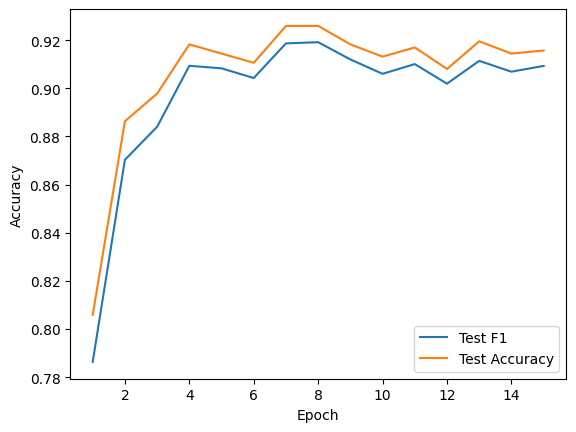

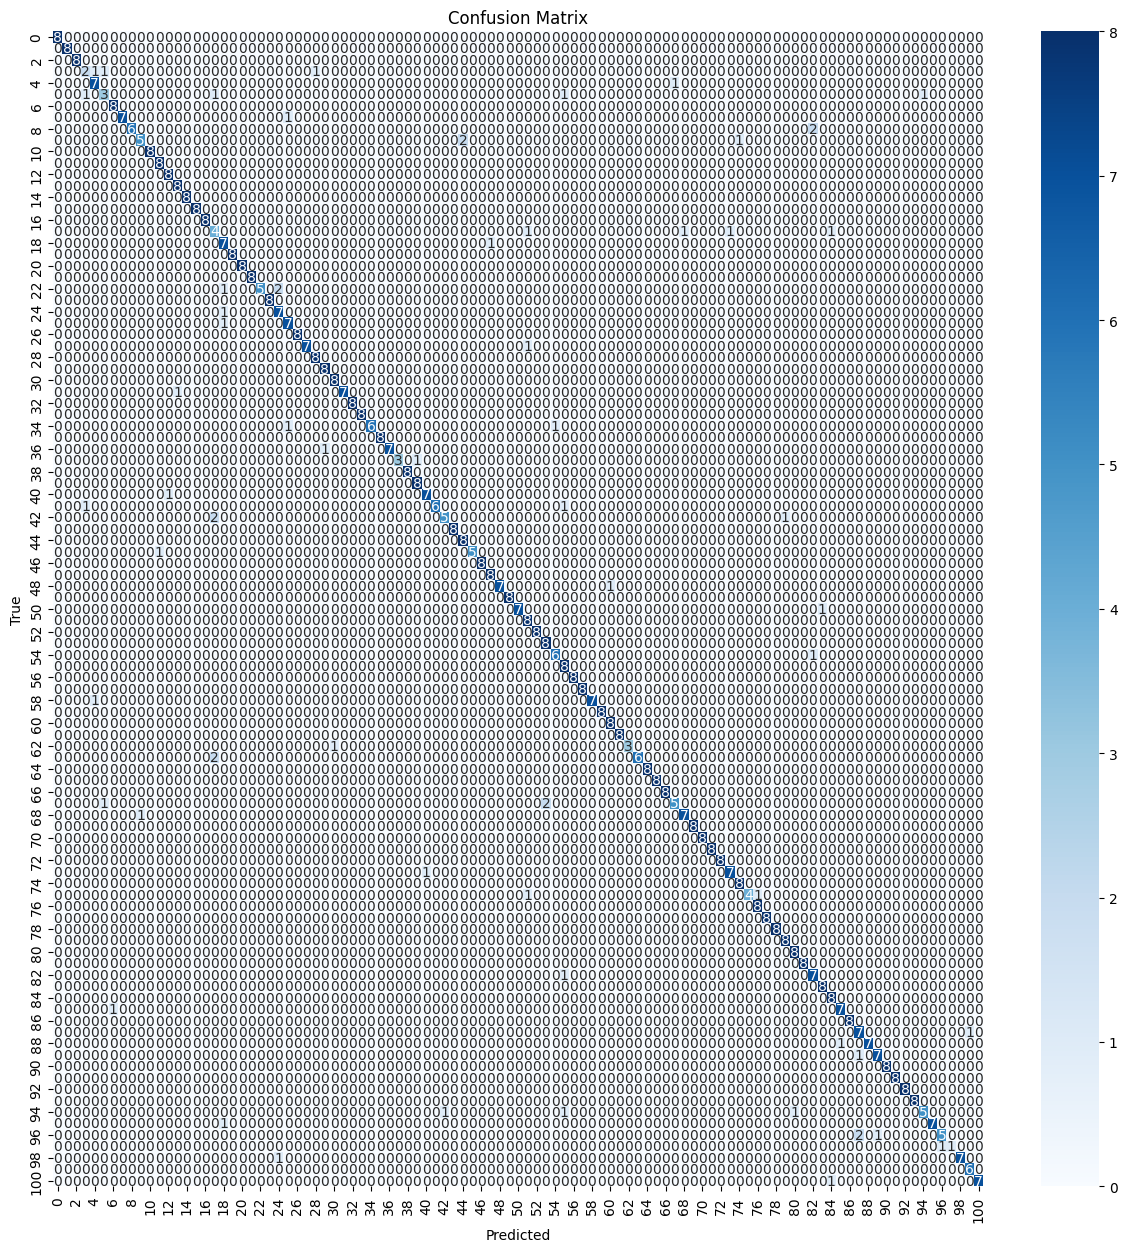

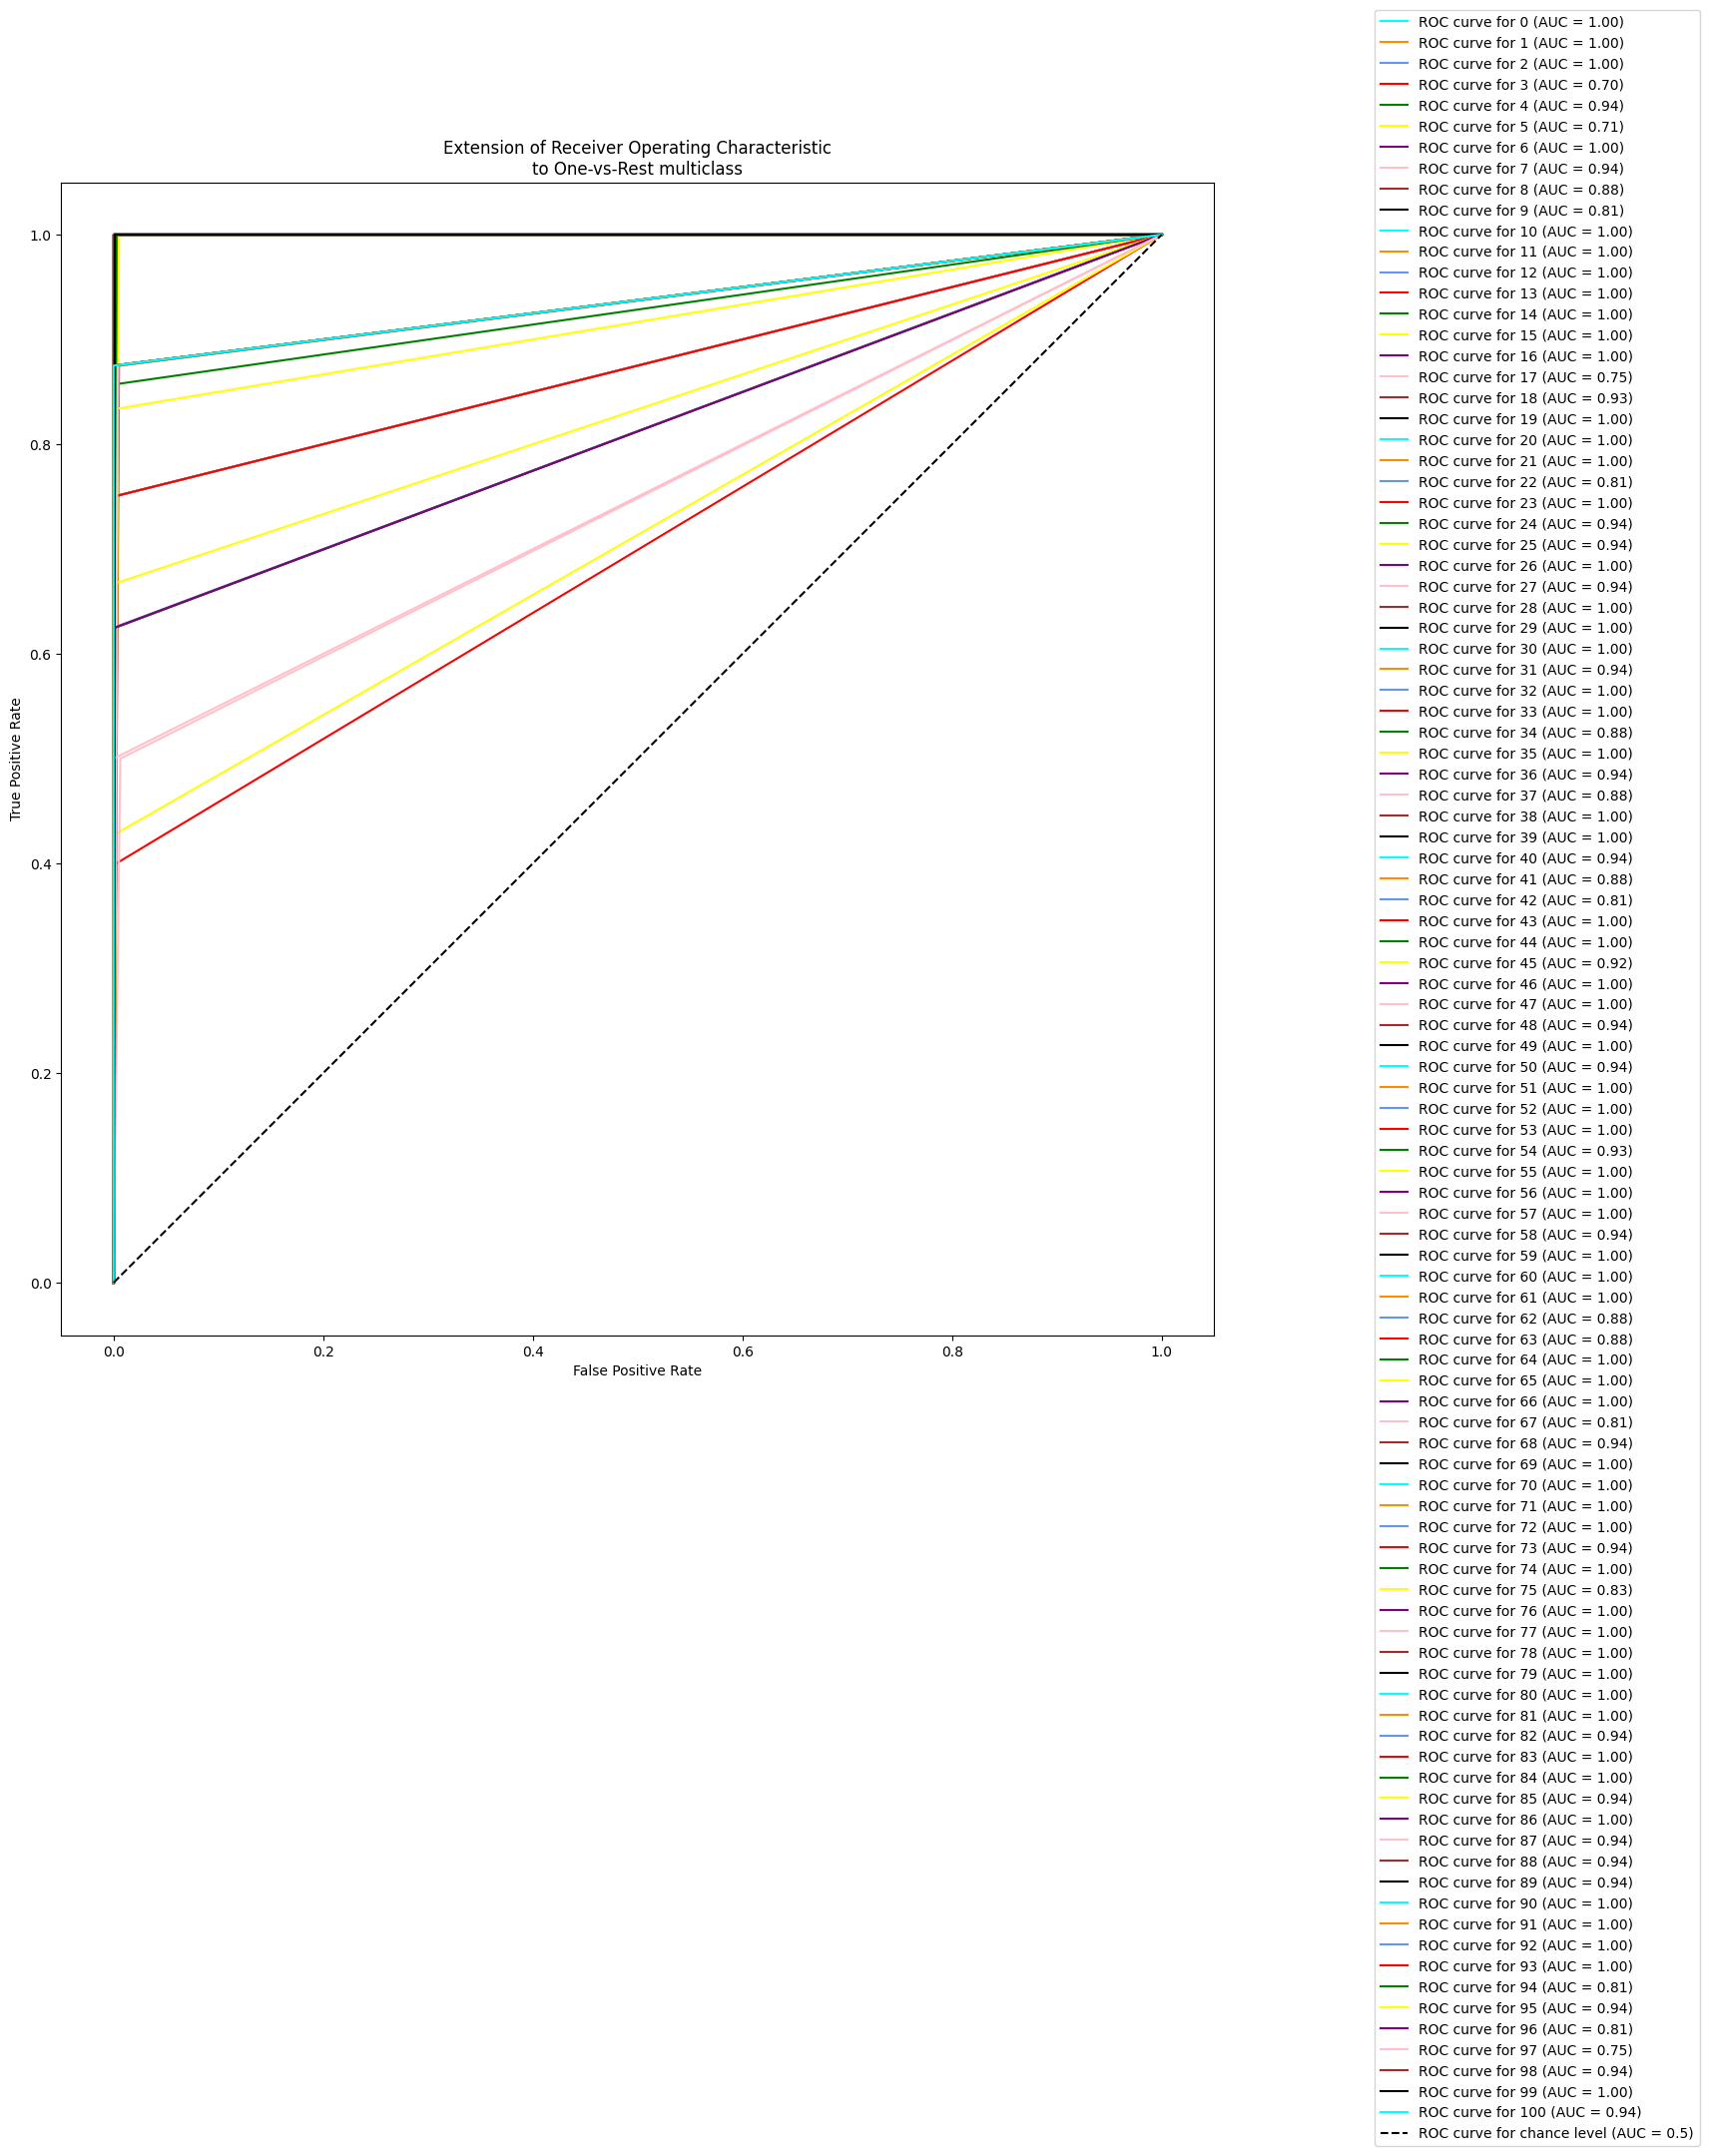

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       0.50      0.40      0.44         5
           4       0.78      0.88      0.82         8
           5       0.60      0.43      0.50         7
           6       0.89      1.00      0.94         8
           7       1.00      0.88      0.93         8
           8       1.00      0.75      0.86         8
           9       0.83      0.62      0.71         8
          10       1.00      1.00      1.00         8
          11       0.89      1.00      0.94         8
          12       0.89      1.00      0.94         8
          13       0.89      1.00      0.94         8
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         8
          17       0.44    

In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True, p=0.2)

Training Late Fusion Model:
Model Memory Usage: 0.30 MB
The number of parameters of the model are: 78949


STAGE:2024-02-10 19:18:43 8107:8107 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.7395, macro-f1: 0.6964
Epoch 1/15 - Training Time: 0.98 seconds | Inference Time: 0.38 seconds
Epoch 2/15 - Test Accuracy: 0.8570, macro-f1: 0.8305
Epoch 2/15 - Training Time: 1.00 seconds | Inference Time: 0.27 seconds
Epoch 3/15 - Test Accuracy: 0.8889, macro-f1: 0.8688
Epoch 3/15 - Training Time: 1.26 seconds | Inference Time: 0.28 seconds
Epoch 4/15 - Test Accuracy: 0.8940, macro-f1: 0.8759
Epoch 4/15 - Training Time: 0.93 seconds | Inference Time: 0.34 seconds
Epoch 5/15 - Test Accuracy: 0.9055, macro-f1: 0.8967
Epoch 5/15 - Training Time: 1.09 seconds | Inference Time: 0.31 seconds
Epoch 6/15 - Test Accuracy: 0.9119, macro-f1: 0.9057
Epoch 6/15 - Training Time: 1.64 seconds | Inference Time: 0.34 seconds
Epoch 7/15 - Test Accuracy: 0.9132, macro-f1: 0.9078
Epoch 7/15 - Training Time: 1.05 seconds | Inference Time: 0.32 seconds
Epoch 8/15 - Test Accuracy: 0.9119, macro-f1: 0.9051
Epoch 8/15 - Training Time: 1.00 seconds | Inference Time: 0.43 seconds


STAGE:2024-02-10 19:19:04 8107:8107 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-10 19:19:04 8107:8107 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         4.41%     747.382ms        78.06%       13.223s      13.157ms    -260.00 Mb    -296.58 Mb          1005  
                                   DataParallel.forward         1.95%     330.993ms        50.48%        8.550s       8.508ms     124.89 Mb     -74.85 Mb          1005  
                                           aten::linear         0.09%      15.829ms        30.16%        5.109s       1.694ms      54.93 Mb       1.18

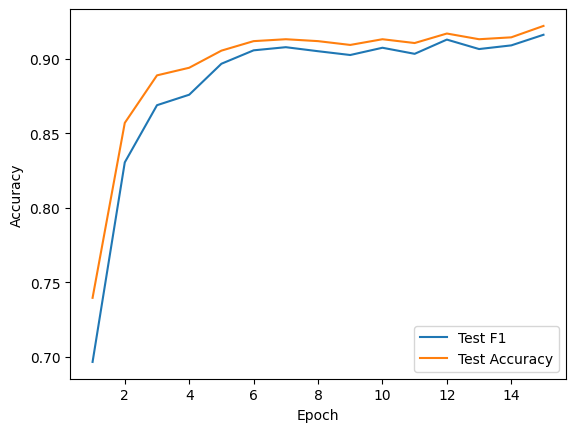

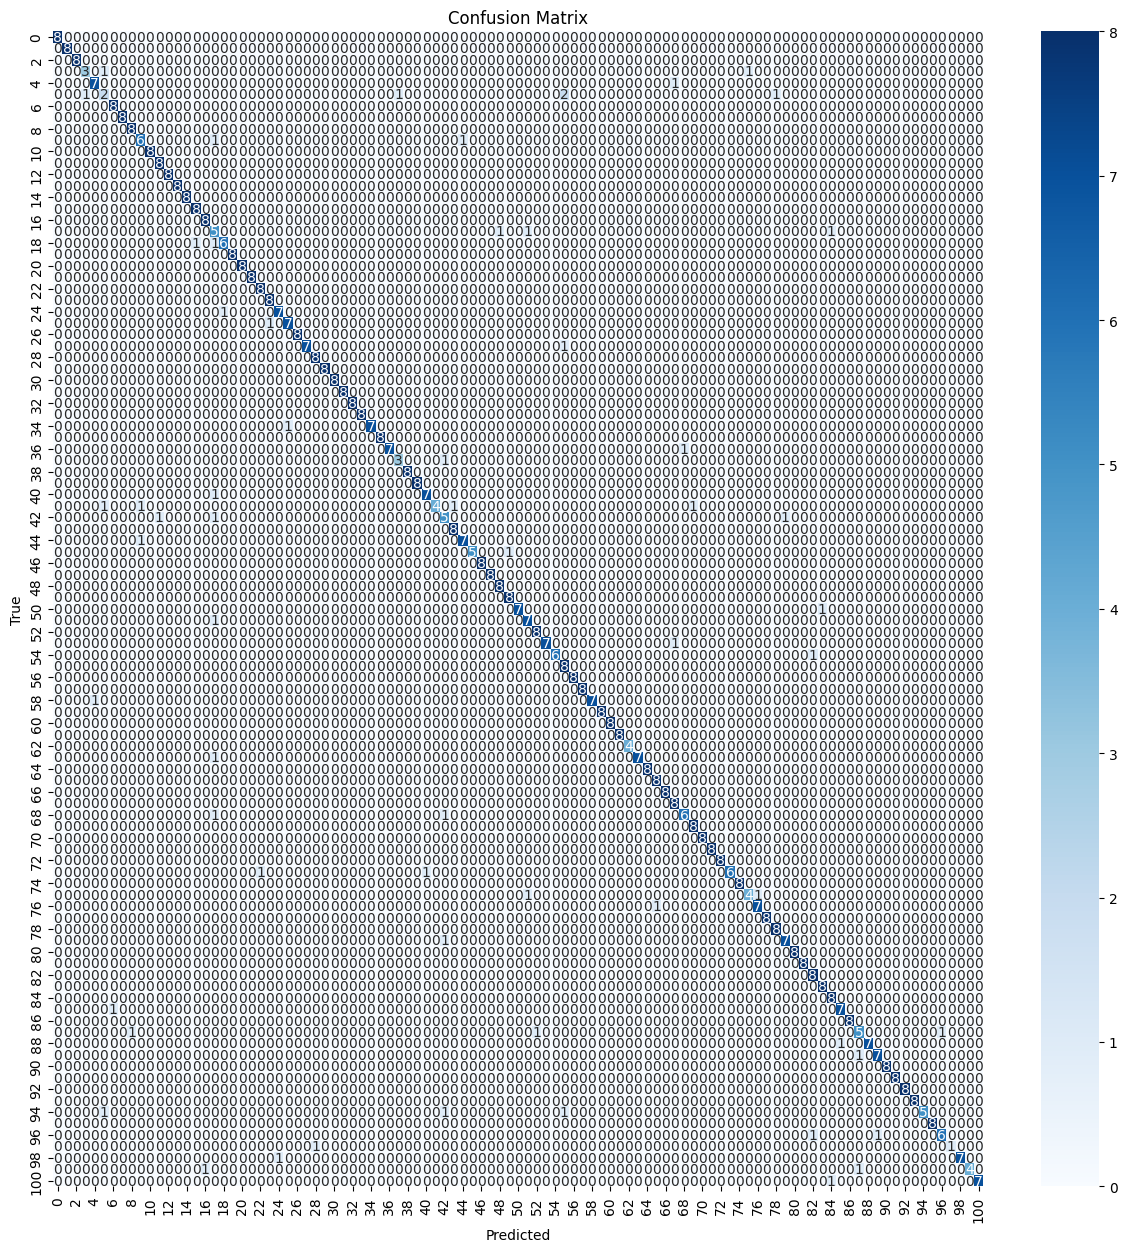

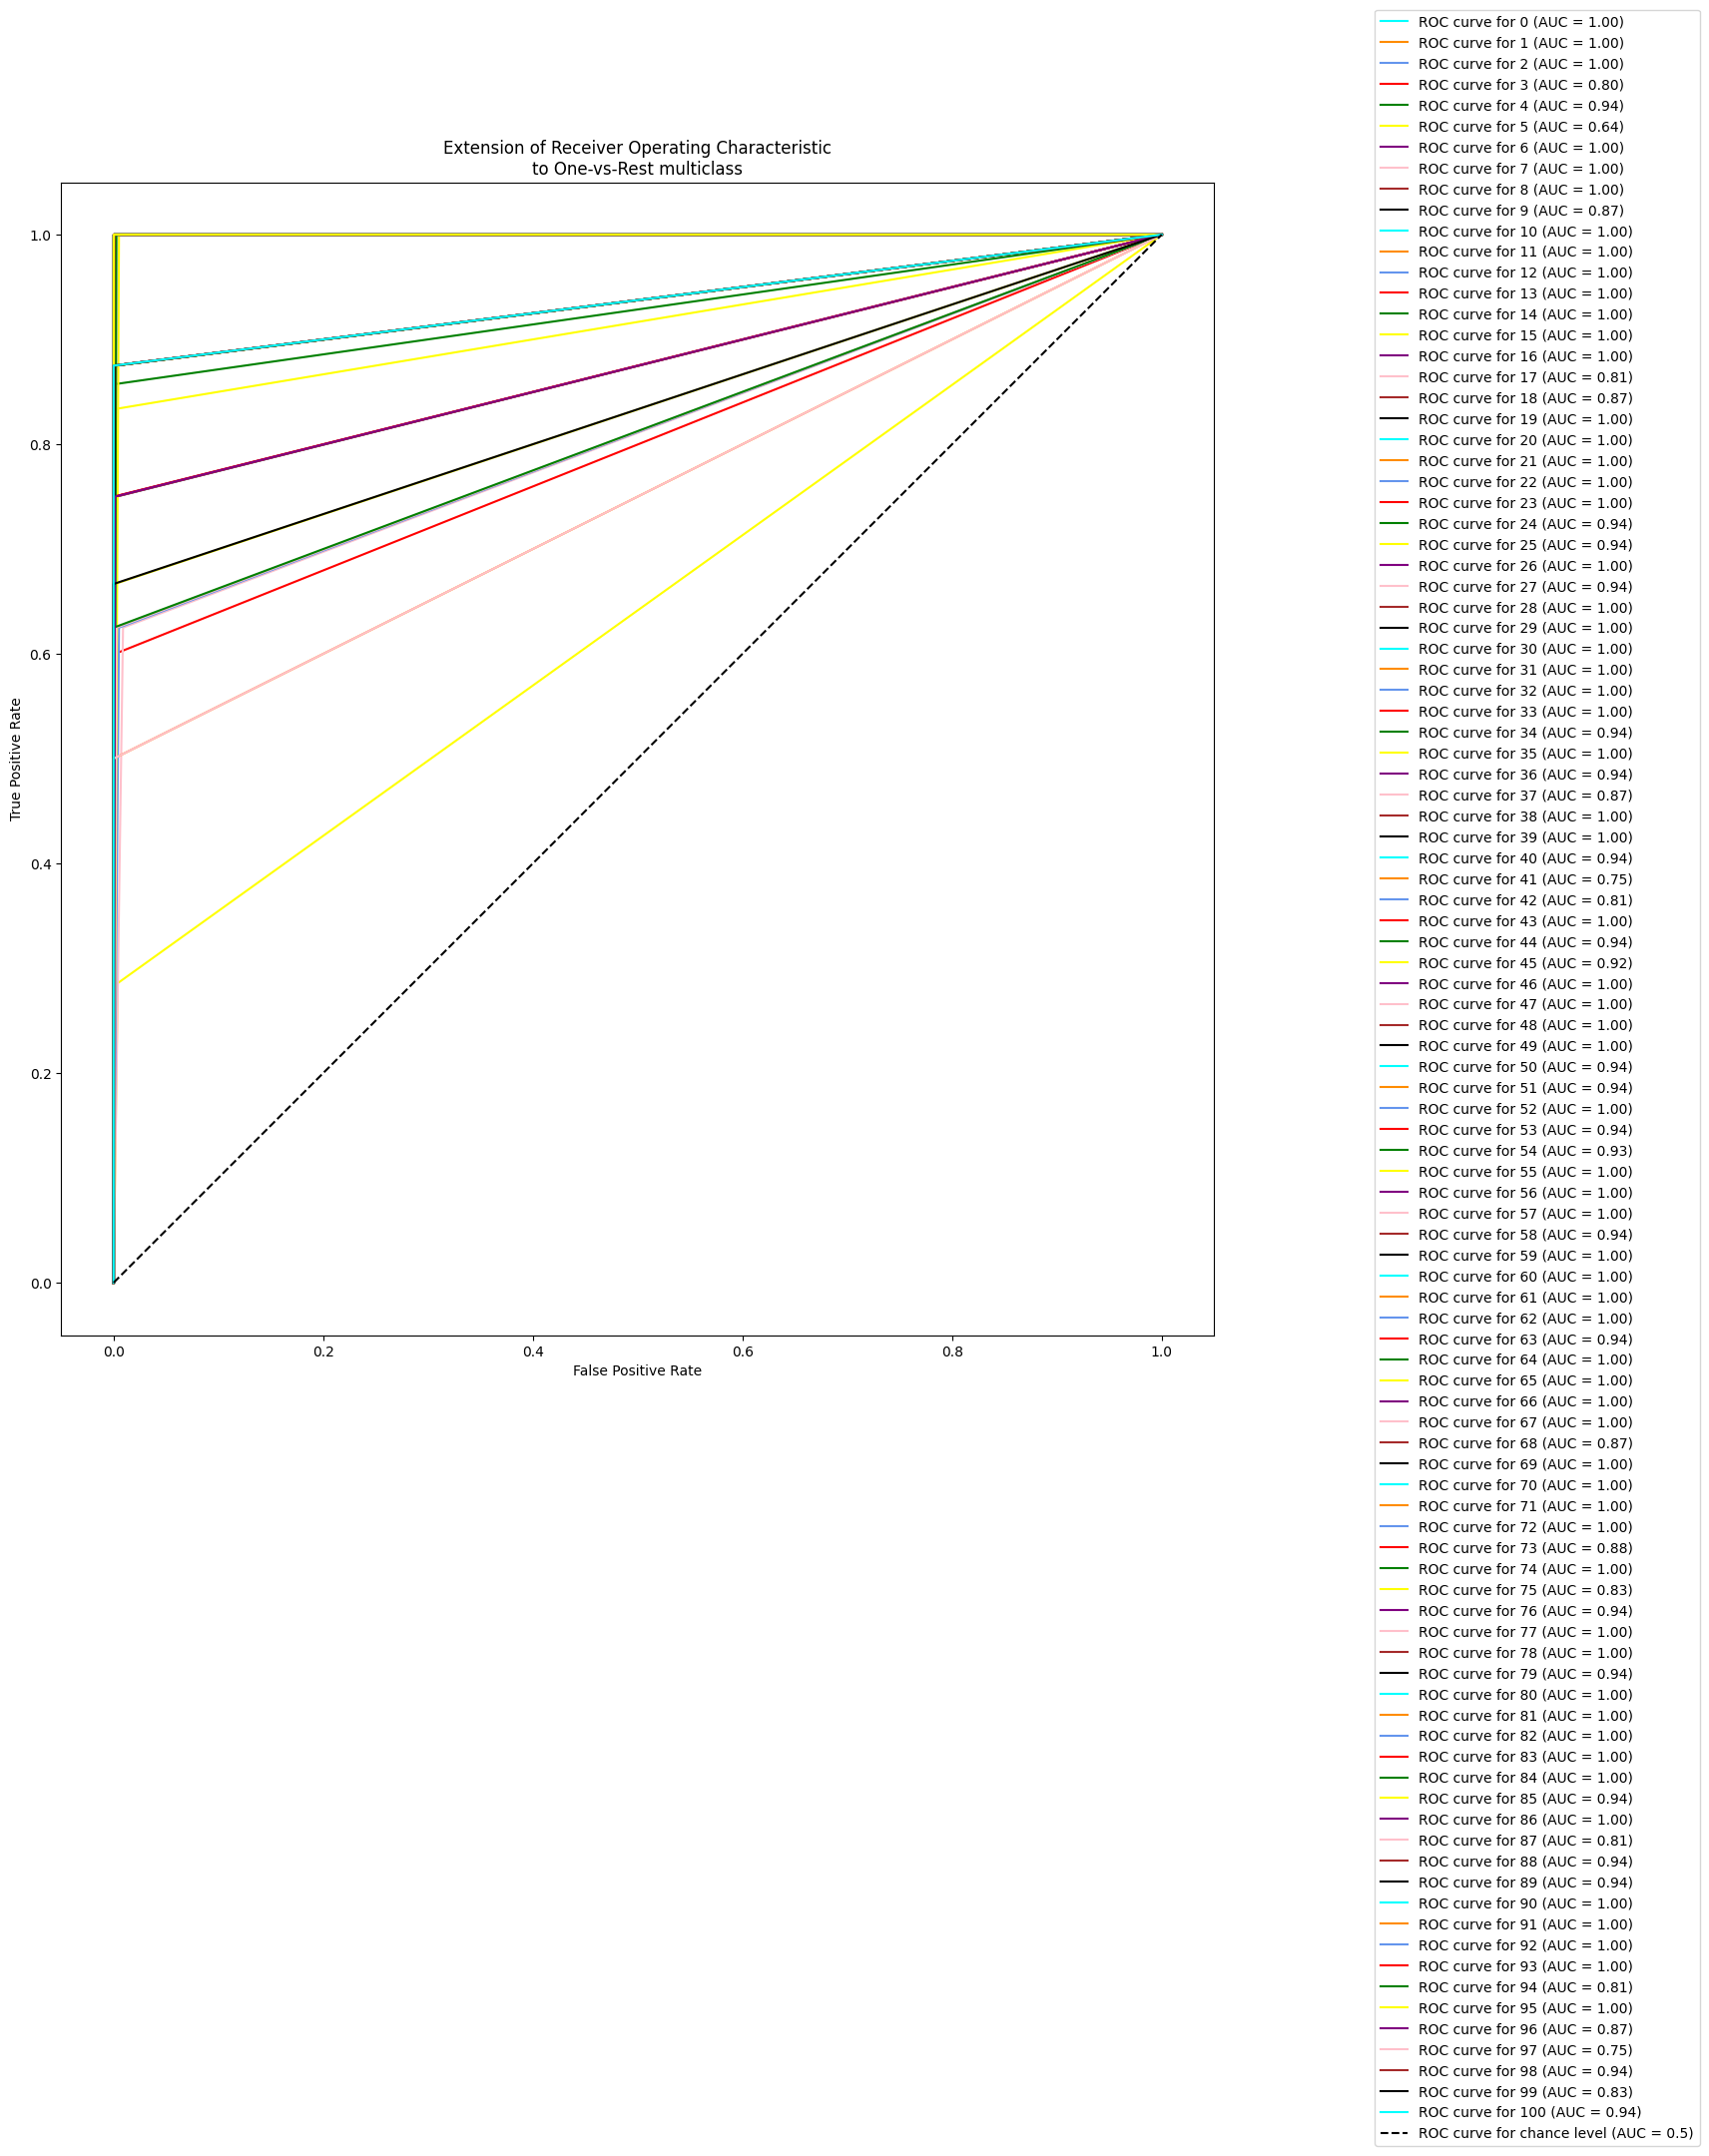

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       0.75      0.60      0.67         5
           4       0.88      0.88      0.88         8
           5       0.40      0.29      0.33         7
           6       0.89      1.00      0.94         8
           7       1.00      1.00      1.00         8
           8       0.89      1.00      0.94         8
           9       0.75      0.75      0.75         8
          10       1.00      1.00      1.00         8
          11       0.89      1.00      0.94         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       0.89      1.00      0.94         8
          16       0.89      1.00      0.94         8
          17       0.42    

In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True, p=0.2)